 PRactica 6

In [1]:
import pandas as pd
import joinCSV as join
import numpy as np
import Utils

# Utilidad creada para juntar los CSV
#join.joinCSV('Data/SensoresSeparados', 'combined_file')
data, X, y = Utils.load_traces('Data/SensoresSeparados/combined_file.csv')

#print(X, y)

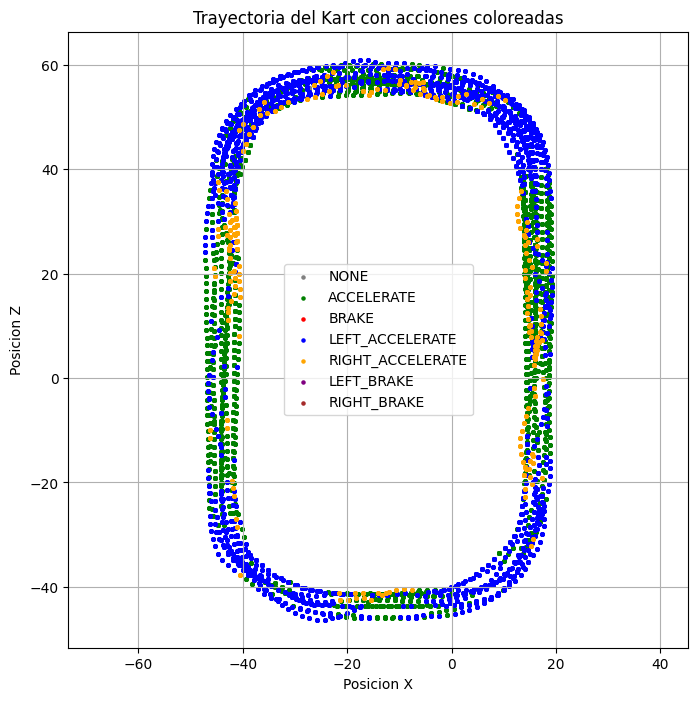

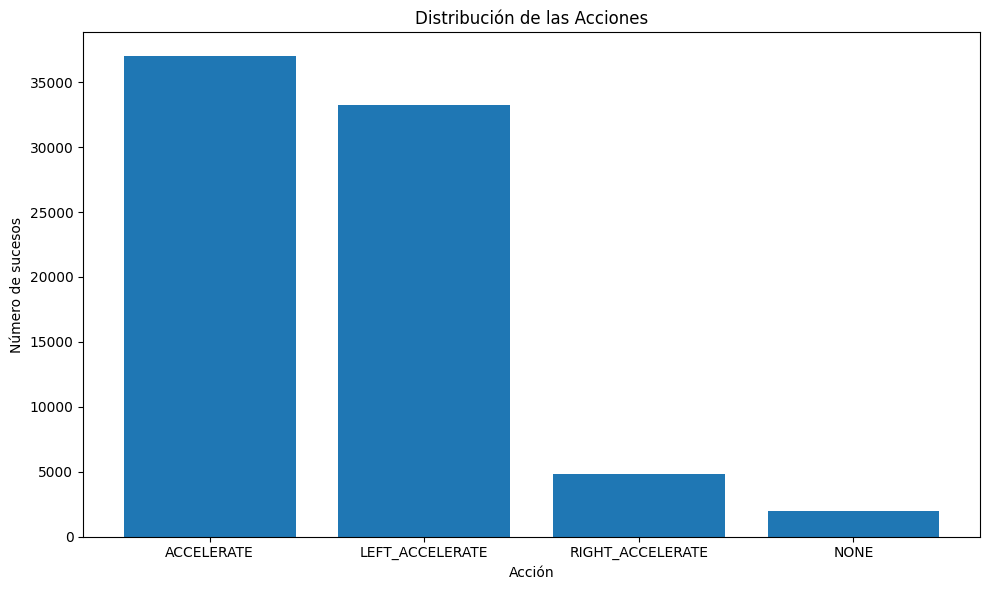

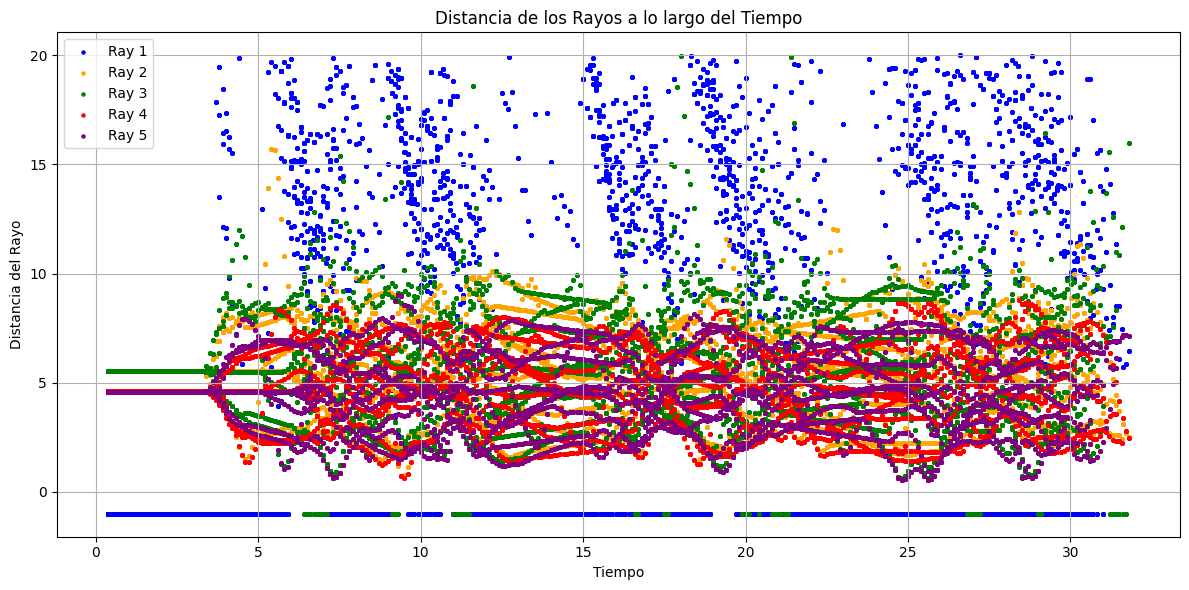

In [2]:
# Cada accion tomada en la posicion que se tomó
Utils.heatmap(data)
Utils.frecuencias(data)
Utils.sensores(data)


# Conclusiones de las cosas representadas
1. No hemos usado frenos en ningun momento y el circuito es un circulo asique tiene sentido que el acelerador y una de las direcciones tenga una clara preferencia.
Hemos descartado la puntuacion de karty porque no hay verticalidad en el circuito no será un factor que afecta a la conducción.
2. Podemos ver que de las 7 acciones posibles no llegamos a usar ninguna que se corresponda a los frenos asique la red será mas facil de entrenar acorde a ello.
3. La última gráfica nos permite averiguar que no hay manera humana de saber si mantener todos los sensores o quitar alguno asique por el momento los dejaremos.

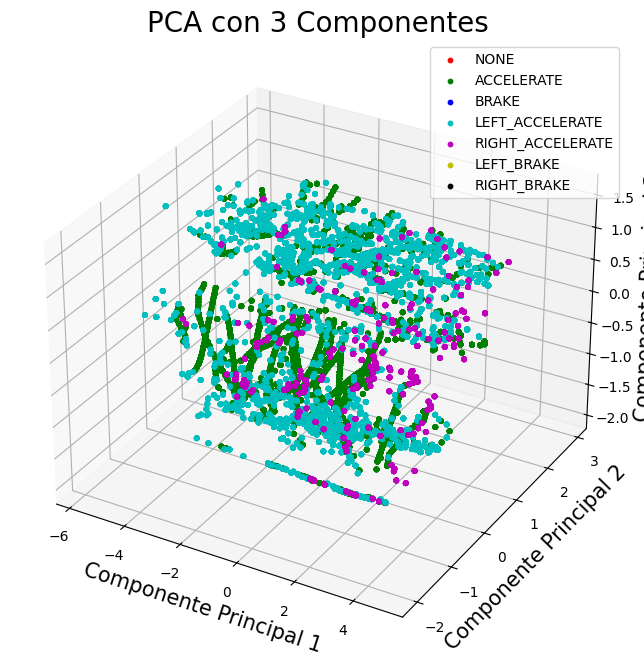

In [3]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Usamos el standard scaler para los datos
# Notese que solo lo hacemos sobre X, no tiene sentido añadir y
scaling = StandardScaler()
scaling.fit(X)
Scaled_data = scaling.transform(X)

# Hacemos Principal Component Analysis DESPUES de Standard Scaler
# Esto da mejores resultados en general
principal = PCA(n_components=3)
principal.fit(Scaled_data)
salidaPCA = principal.transform(Scaled_data)
# print(X.shape, Scaled_data.shape)

Utils.sensores3D(salidaPCA, data)


# Tendremos que cambiar las etiquetas a one hot encoding
from sklearn.preprocessing import OneHotEncoder

#etiquetas = ['NONE', 'ACCELERATE', 'BRAKE', 'LEFT_ACCELERATE','RIGHT_ACCELERATE', 'LEFT_BRAKE', 'RIGHT_BRAKE']
# En la realidad habrá menos etiquetas, no hemos usado en este caso ningun freno asique nos devuelve valores de 000 a 100

oneHotEncoder = OneHotEncoder(drop='first', sparse_output=False)    # Incia encoder
oneHotEncoder.fit(y.values.reshape(-1, 1))                  # "Entrena encoder"
encoded = oneHotEncoder.transform(y.values.reshape(-1, 1))  # Devuelve las etiquetas segun codificacion

#print(encoded) # Nos muestra un valor por etiqueta {000, 001, 010, 100} en este caso solo hay 4

# Division de los datos en entrenamiento y prueba
# 80% de las entradas irán a entrenamiento y 20% restante a comprobarlos más tarde
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Scaled_data, encoded, train_size = 0.8, random_state = 1234)
x_trainP, x_testP, y_trainP, y_testP = train_test_split(salidaPCA, encoded, train_size = 0.8, random_state = 1234)

#print (x_train, y_train, x_test, y_test)
#print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)


2.035800357716189
Iteration      1: Cost   2.0358   
2.035745723593393
Iteration      2: Cost   2.0357   
2.03569109320546
Iteration      3: Cost   2.0357   
2.0356364665521185
Iteration      4: Cost   2.0356   
2.0355818436330946
Iteration      5: Cost   2.0356   
2.035527224448118
Iteration      6: Cost   2.0355   
2.0354726089969137
Iteration      7: Cost   2.0355   
2.0354179972792106
Iteration      8: Cost   2.0354   
2.0353633892947354
Iteration      9: Cost   2.0354   
2.0353087850432163
Iteration     10: Cost   2.0353   
2.035254184524381
Iteration     11: Cost   2.0353   
2.035199587737957
Iteration     12: Cost   2.0352   
2.035144994683672
Iteration     13: Cost   2.0351   
2.0350904053612533
Iteration     14: Cost   2.0351   
2.0350358197704286
Iteration     15: Cost   2.0350   
2.034981237910926
Iteration     16: Cost   2.0350   
2.034926659782473
Iteration     17: Cost   2.0349   
2.0348720853847966
Iteration     18: Cost   2.0349   
2.0348175147176257
Iteration     19: C

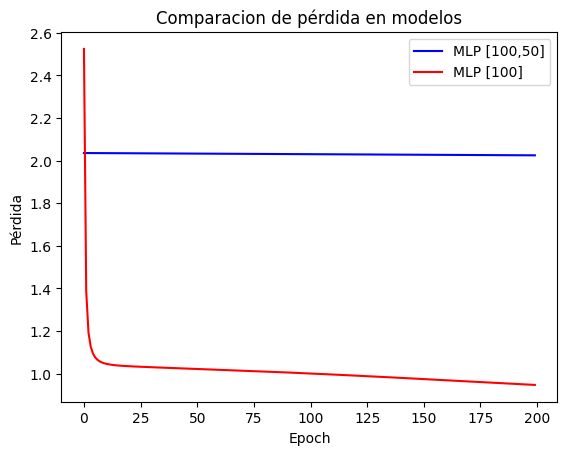

<Figure size 640x480 with 0 Axes>

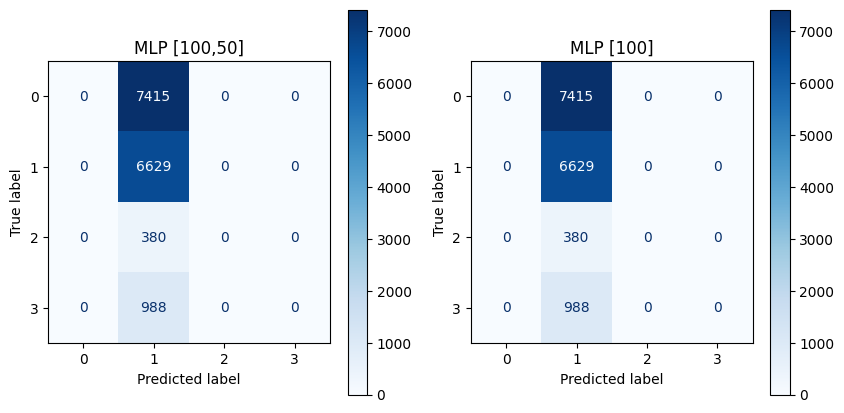

Precisión del modelo MLP [100,50]: 0.43011938749026735
Precisión del modelo MLP [100]: 0.43011938749026735


In [4]:

import MLP_complete

# Scaled_data son los 8 valores Escalados
# salidaPCA tiene tamaño 3, codifica los 4 valores de etiquetas en estilo [(0,0,0), ...  ,(1,0,0)]
# encoded son los valores con el one-hot encoding

inputSize = x_train.shape[1]
hiddenLayers = [100,50]
outputSize = y_train.shape[1]

# Perceptrón multicapa diseñado por nosotros
# Esta vez es multicapa de verdad ;)
mlpP6 = MLP_complete.MLP(inputSize, hiddenLayers, outputSize, seed=42, epislom=0.1)

# Entrenamos la red
alpha = 0.00001 # Learning rate
lambda_ = 1
numIter = 200
J_history = mlpP6.backpropagation(x_train, y_train, alpha, lambda_, numIter)

prediccionesMLPP6 = mlpP6.predict(x_test)
#predicciones = mlpP6.predict(Scaled_data)
# print(predicciones, predicciones.shape[0])
# print(y_test, y_test.shape[0])

y_test_reversed = oneHotEncoder.inverse_transform(y_test)
predictionsMLPP6_reversed = oneHotEncoder.inverse_transform(prediccionesMLPP6)

inputSize = x_train.shape[1]
hiddenLayers = [100]
outputSize = y_train.shape[1]

# Perceptrón multicapa diseñado por nosotros
# Esta vez es multicapa de verdad ;)
mlpP6_2 = MLP_complete.MLP(inputSize, hiddenLayers, outputSize, seed=42, epislom=0.1)

# Entrenamos la red
alpha = 0.1 # Learning rate
lambda_ = 1
numIter = 200
J_history2 = mlpP6_2.backpropagation(x_train, y_train, alpha, lambda_, numIter)

prediccionesMLPP6_2 = mlpP6_2.predict(x_test)
predictionsMLPP6_2_reversed = oneHotEncoder.inverse_transform(prediccionesMLPP6_2)

print(mlpP6.prob(x_test))

#predicciones = mlpP6.predict(Scaled_data)
# print(predicciones, predicciones.shape[0])
# print(y_test, y_test.shape[0])



Utils.compareLoss('MLP [100,50]', J_history, 'MLP [100]', J_history2)
Utils.confussionmatrix('MLP [100,50]', y_test_reversed, predictionsMLPP6_reversed, 'MLP [100]', predictionsMLPP6_2_reversed)


c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


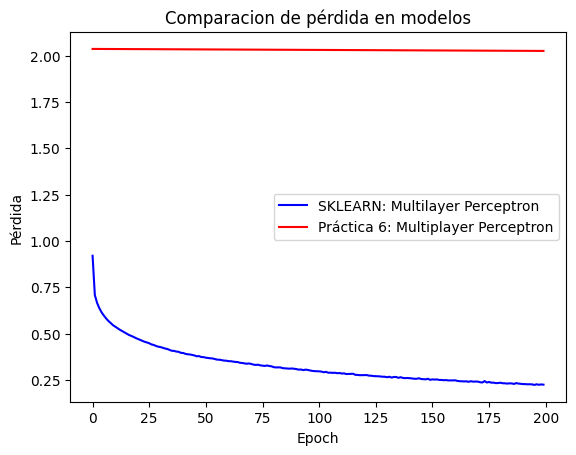

<Figure size 640x480 with 0 Axes>

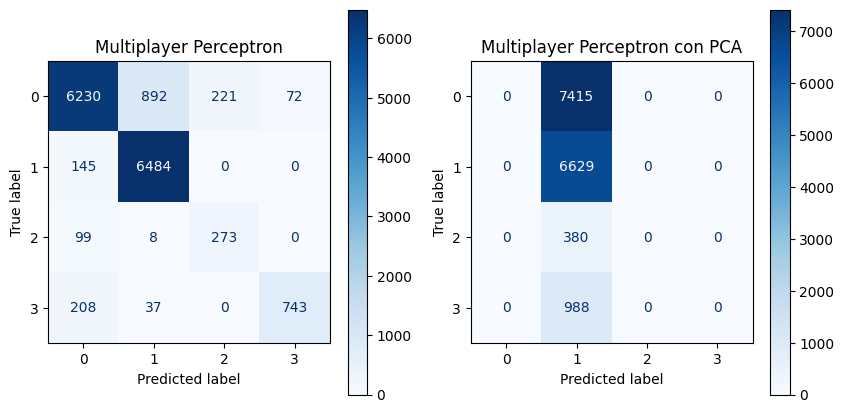

Precisión del modelo Multiplayer Perceptron: 0.8908642616143265
Precisión del modelo Multiplayer Perceptron con PCA: 0.43011938749026735


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# MLP de Sklearn
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, alpha =0.0001,
solver='adam', verbose =0, random_state=21, tol=0.000000001)

mlp.fit(x_train, y_train)
mlp_loss = mlp.loss_curve_

# Comparación de curvas de pérdida
Utils.compareLoss('SKLEARN: Multilayer Perceptron', mlp_loss, 'Práctica 6: Multiplayer Perceptron', J_history)

# Matrices de confusión
predictions = mlp.predict(x_test)
y_test_reversed = oneHotEncoder.inverse_transform(y_test)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)

Utils.confussionmatrix('SKLEARN: MLP', y_test_reversed, predictions_reversed, 'P6: MLP', predictionsMLPP6_reversed)

c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


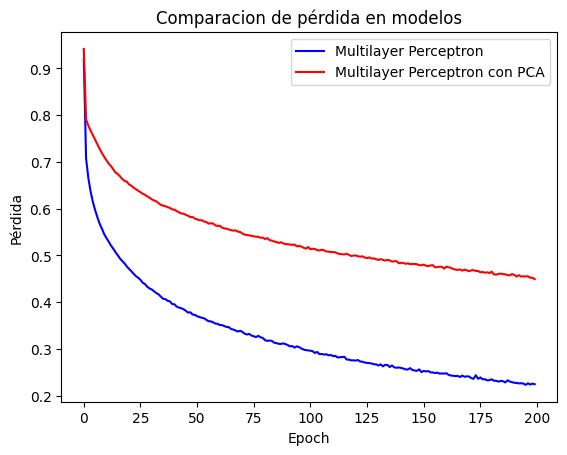

<Figure size 640x480 with 0 Axes>

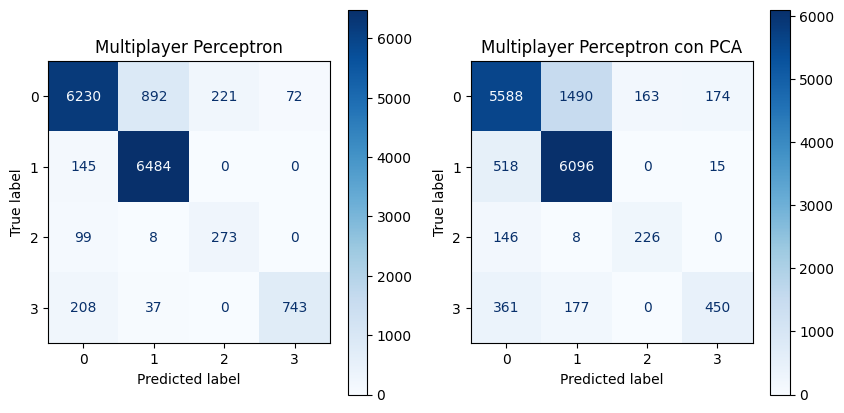

Precisión del modelo Multiplayer Perceptron: 0.8908642616143265
Precisión del modelo Multiplayer Perceptron con PCA: 0.801972488969634


In [6]:


mlpPCA = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, alpha =0.0001,
solver='adam', verbose =0, random_state=21, tol=0.000000001)

mlpPCA.fit(x_trainP, y_trainP)
mlpPCA_loss = mlpPCA.loss_curve_

# Comparación de curvas de pérdida
Utils.compareLoss('Multilayer Perceptron', mlp_loss, 'Multilayer Perceptron con PCA', mlpPCA_loss)


# Matrices de confusión
predictions = mlp.predict(x_test)
y_test_reversed = oneHotEncoder.inverse_transform(y_test)
predictions_reversed = oneHotEncoder.inverse_transform(predictions)

predictions = mlpPCA.predict(x_testP)
y_test_reversed2 = oneHotEncoder.inverse_transform(y_testP)
predictions_reversed2 = oneHotEncoder.inverse_transform(predictions)

Utils.confussionmatrix('Multiplayer Perceptron', y_test_reversed, predictions_reversed, 'Multiplayer Perceptron con PCA', predictions_reversed2)



# Conclusiones de PCA
Los resultados parecen mostrar que para la cantidad de datos de entrada usar PCA no solo no es necesario sino que empeora el resultado.

In [7]:

# Modelo con red mas pequeña
mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=200, alpha =0.0001,
solver='adam', verbose =0, random_state=21, tol=0.000000001)
mlp2.fit(x_train, y_train)
mlp2_loss = mlp2.loss_curve_

# Modelo con alpha de 5
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, alpha =0.0005,
solver='adam', verbose =0, random_state=21, tol=0.000000001)
mlp3.fit(x_train, y_train)
mlp3_loss = mlp3.loss_curve_

# Modelo con solo 1 capa
mlp4 = MLPClassifier(hidden_layer_sizes=(100), max_iter=200, alpha =0.0001,
solver='adam', verbose =0, random_state=21, tol=0.000000001)
mlp4.fit(x_train, y_train)
mlp4_loss = mlp4.loss_curve_

# Modelo con 4 capas simples
mlp5 = MLPClassifier(hidden_layer_sizes=(12,12,12,12), max_iter=200, alpha =0.0001,
solver='adam', verbose =0, random_state=21, tol=0.000000001)
mlp5.fit(x_train, y_train)
mlp5_loss = mlp5.loss_curve_



c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

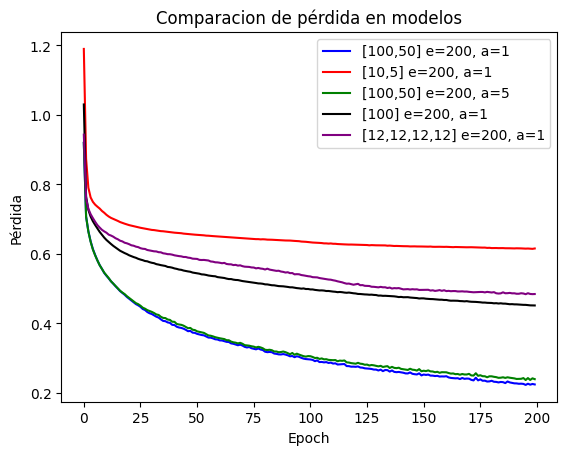

<Figure size 640x480 with 0 Axes>

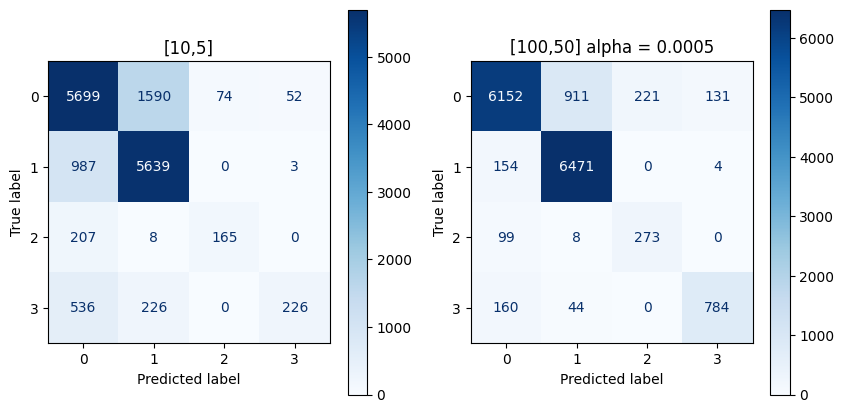

Precisión del modelo [10,5]: 0.7610303659486115
Precisión del modelo [100,50] alpha = 0.0005: 0.8876200363353232


<Figure size 640x480 with 0 Axes>

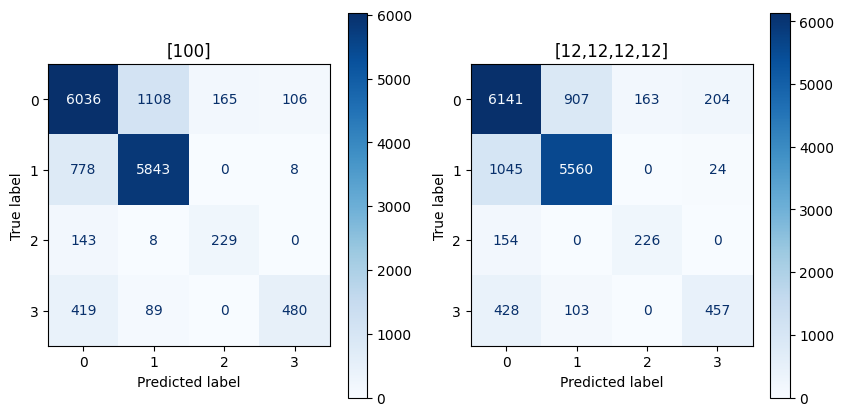

Precisión del modelo [100]: 0.8167661562418894
Precisión del modelo [12,12,12,12]: 0.8035297171035557


In [8]:
plt.plot(mlp_loss, label="[100,50] e=200, a=1", color='blue')
plt.plot(mlp2_loss, label="[10,5] e=200, a=1", color='red')
plt.plot(mlp3_loss, label="[100,50] e=200, a=5", color='green')
plt.plot(mlp4_loss, label="[100] e=200, a=1", color='black')
plt.plot(mlp5_loss, label="[12,12,12,12] e=200, a=1", color='purple')
plt.legend()
plt.title('Comparacion de pérdida en modelos')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.show()

# Matrices de confusión
predictions2 = mlp2.predict(x_test)
predictions_reversed2 = oneHotEncoder.inverse_transform(predictions2)
predictions3 = mlp3.predict(x_test)
predictions_reversed3 = oneHotEncoder.inverse_transform(predictions3)

predictions4 = mlp4.predict(x_test)
predictions_reversed4 = oneHotEncoder.inverse_transform(predictions4)
predictions5 = mlp5.predict(x_test)
predictions_reversed5 = oneHotEncoder.inverse_transform(predictions5)

Utils.confussionmatrix('[10,5]', y_test_reversed, predictions_reversed2, '[100,50] alpha = 0.0005', predictions_reversed3)
Utils.confussionmatrix('[100]', y_test_reversed, predictions_reversed4, '[12,12,12,12]', predictions_reversed5)

# Conclusiones de diferentes configuraciones
El primer modelo (y el que mejores resultados ofrece) tiene capas de [100, 50] 200 epochs y un alpha de 0.0001.

Como podemos ver en las otra permutaciones es VITAL elegir bien la configuracion de las capas. Una red con demasiadas [12,12,12,12] o demasiado pocas [100] no llega a converger

In [9]:
import pickle

# save
with open('model_mlp.pkl','wb') as f:
    pickle.dump(mlp,f)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(x_train, y_train)

KNNPCA = KNeighborsClassifier(n_neighbors = 1)
KNNPCA.fit(x_trainP, y_trainP)


KNeighborsClassifier(n_neighbors=1)

<Figure size 640x480 with 0 Axes>

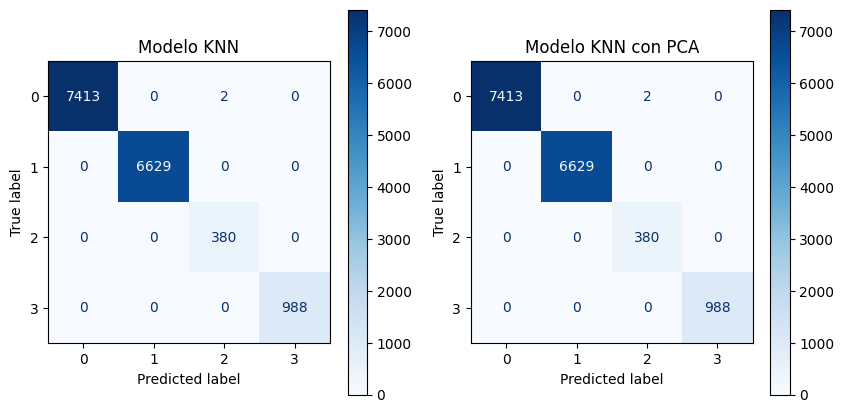

Precisión del modelo Modelo KNN: 0.9998702309888399
Precisión del modelo Modelo KNN con PCA: 0.9998702309888399


In [11]:
predictionsKNN = KNN.predict(x_test)
predictions_reversedKNN = oneHotEncoder.inverse_transform(predictionsKNN)

predictionsKNNPCA = KNNPCA.predict(x_testP)
predictions_reversedKNNPCA = oneHotEncoder.inverse_transform(predictionsKNNPCA)

Utils.confussionmatrix('Modelo KNN', y_test_reversed, predictions_reversedKNN, 'Modelo KNN con PCA', predictions_reversedKNNPCA)

# Conclusiones
KNN parece ser la opcion superior por un margen MUY amplio.
No tengo ni la menor idea de porque sale a la perfección tbh.

<Figure size 640x480 with 0 Axes>

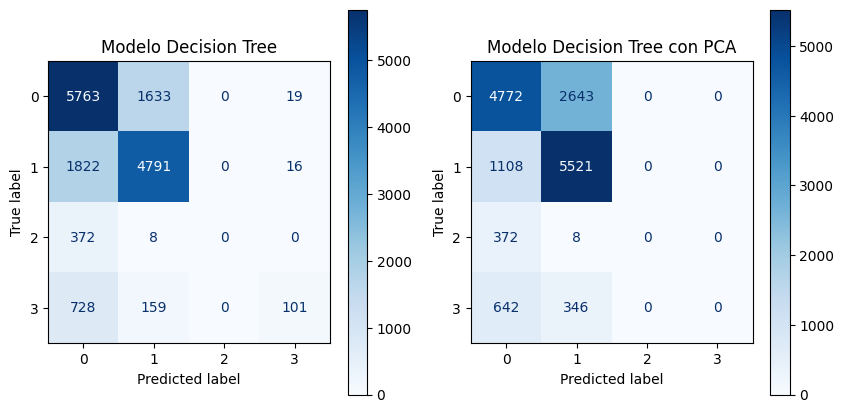

Precisión del modelo Modelo Decision Tree: 0.691344406955619
Precisión del modelo Modelo Decision Tree con PCA: 0.6678562159356346


In [12]:
from sklearn.tree import DecisionTreeClassifier, export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(x_train, y_train)

decision_treeP = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_treeP.fit(x_trainP, y_trainP)
#r = export_text(decision_tree, features_names=)

decision_tree.score(x_test, y_test)
decision_treeP.score(x_testP, y_testP)

predictionsDT = decision_tree.predict(x_test)
predictions_reversedDT = oneHotEncoder.inverse_transform(predictionsDT)
predictionsDTP = decision_treeP.predict(x_testP)
predictions_reversedDTP = oneHotEncoder.inverse_transform(predictionsDTP)

Utils.confussionmatrix('Modelo Decision Tree', y_test_reversed, predictions_reversedDT, 'Modelo Decision Tree con PCA', predictions_reversedDTP)

# cm = confusion_matrix(y_test_reversed, predictions_reversed)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()
# accuracy = accuracy_score(y_test_reversed, predictions_reversed)
# print(f"Precisión: {accuracy}")

# cm = confusion_matrix(y_test_reversed, predictions_reversed)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()
# accuracy = accuracy_score(y_test_reversed, predictions_reversed)
# print(f"Precisión: {accuracy}")

# COnclusion
Decision tree parece dar resultados por debajo de los otros modelos con diferencia mostrando PCA con aun mas perdidas de aciertos

<Figure size 640x480 with 0 Axes>

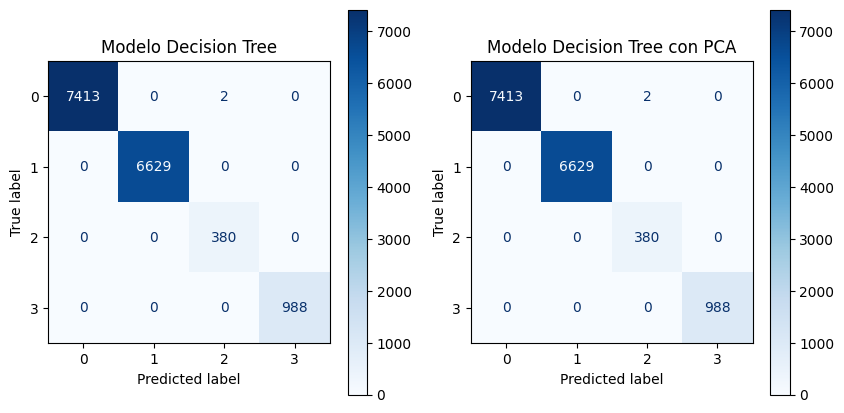

Precisión del modelo Modelo Decision Tree: 0.9998702309888399
Precisión del modelo Modelo Decision Tree con PCA: 0.9998702309888399


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

rfP = RandomForestClassifier(n_estimators=100, random_state=0)
rfP.fit(x_trainP, y_trainP)

# r = export_text(rf.estimators_[0], feature_names=feature_names)
# print(r)

predictionsRF = rf.predict(x_test)
predictions_reversedRF = oneHotEncoder.inverse_transform(predictionsRF)
predictionsRFP = rfP.predict(x_testP)
predictions_reversedRFP = oneHotEncoder.inverse_transform(predictionsRFP)

Utils.confussionmatrix('Modelo Decision Tree', y_test_reversed, predictions_reversedRF, 'Modelo Decision Tree con PCA', predictions_reversedRFP)

# Conclusion
Random Forest presenta una mejora notable respecto a los Decision Tree simples pero aun asi no  sería la mejor de las opciones. En este caso contamos con una pista de conduccion simple y pocas variables, pero por la propia naturaleza de los juegos de carreras en cuanto mas complejo se vuelva la situacion mas ganarán algoritmos como MLP o KNN